In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

- sales:  output or target variable
- TV, radio, newspaper: inputs or features

In [2]:
advert = pd.read_csv('Data/Advertising.csv')
advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


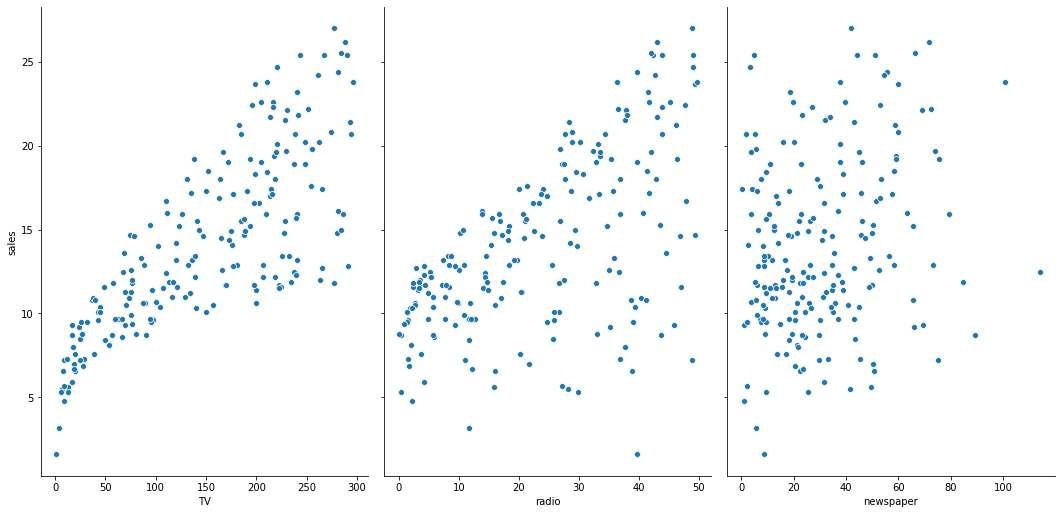

In [3]:
sns.pairplot(advert, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

In [4]:
X = advert[['TV', 'radio', 'newspaper']]
Y = advert.sales

lm1 = LinearRegression() #Linear Model 1
lm1.fit(X, Y)

print('Theta 0:',lm1.intercept_)
print('Theta 1,2 and 3:',lm1.coef_)

Theta 0: 2.938889369459412
Theta 1,2 and 3: [ 0.04576465  0.18853002 -0.00103749]


**R-Square** is a statistical measure which tells us how 'good' are fit is. It ranges from 0 to 1. In general higher the R-square, the better the model fits the data and hence this needs to be maximised.

**Root Mean Squared Error** (RMSE) is the mean of the squared errors: 
<h5 align=center> $$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$ </h5>
This needs to be minimised.

In [5]:
# We will use train_test_split to split our data-set into a training and testing data-set

X = advert[['TV', 'radio', 'newspaper']]
Y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

lm2 = LinearRegression()
lm2.fit(X_train, y_train)
lm2_preds = lm2.predict(X_test)

print("MSE :", np.sqrt(mean_squared_error(y_test, lm2_preds)))
print("R^2: ", r2_score(y_test, lm2_preds))

MSE : 1.404651423032895
R^2:  0.9156213613792232


In [6]:
# In the next model we will use only TV and radio and see how that affects our error and R-square terms

X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm3 = LinearRegression()
lm3.fit(X_train, y_train)
lm3_preds = lm3.predict(X_test)

print("MSE :", np.sqrt(mean_squared_error(y_test, lm3_preds)))
print("R^2: ", r2_score(y_test, lm3_preds))

MSE : 1.3879034699382888
R^2:  0.9176214942248907


From the above values we can observe that linear model 3 has a higher R-square term and lower RMSE error. We can thus conclude that *newspaper* as a feature is not reliable, does not make the fit good and hence can be ignored

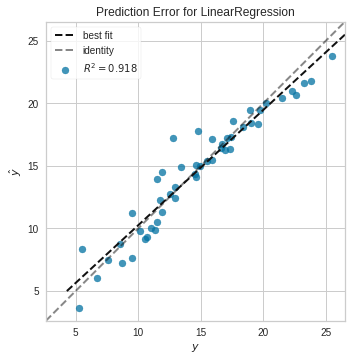

In [8]:
# This cell gives a visual representation of our regression line. You will need to install yellowbrick package to run the cell below.

from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm3)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof();